<a href="https://colab.research.google.com/github/emerenan/Desafio_Tiendanube/blob/master/Desafio_Tiendanube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd

def readfile(filepath, newname):
    """ Método para ler o arquivo e salvar num dataframe.
    Args:
        filepath (str): Caminho onde o arquivo está localizado.
    Returns:
        DataFrame com os valores da planilha já tratados.
    Raises:
        CParserError: Imprimi uma mensagem de erro de leitura mais a localização do erro de analise do arquivo.
    """
    try:
        data_xls = pd.read_excel(filepath)
        
    except pd.io.common.CParserError:
        print("Erro de leitura do arquivo")

novo = readfile("/content/Exercicio_1 - datos-trials-may17-BR.xlsx", "novo")

AttributeError: ignored

In [ ]:
# Group the data by gender and device 
purchase_data_upd = purchase_data.groupby(by=['gender', 'device'], as_index=False)

# Aggregate the month1 and price data 
purchase_summary = purchase_data_upd.agg(
                        {'month1': ['mean', 'median'],
                        'price': ['mean', 'median']})

# Examine the results 
print(purchase_summary)

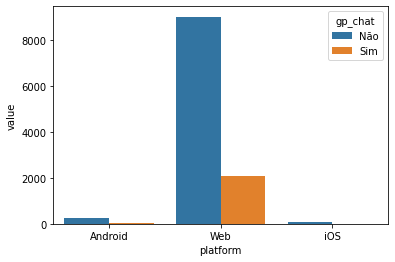

In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Método para contagem
def count_entries(df, col_name):
    """Retorna um dicionario com a contagem de ocorrências de cada chave
    
    :param df:
    :param col_name:

    """
    cols_count = {}

    try:
        col = df[col_name]

        for entry in col:
            if entry in cols_count.keys():
                cols_count[entry] += 1
            else:

                cols_count[entry] = 1

        return cols_count

    # Add except block
    except:
        print('The DataFrame does not have a ' + col_name + ' column.')

# Método para converter a coluna float64 para str
def bool_trans(df, column, val_true, val_false):
    """ Método para transformar as colunas que estão em float64 para strings categóricas
    
    :param df:
    :param column:
    :param val_true:
    :param val_false:
    """
    list = []

    for row in df[column].values:
        if row == 1.0:
            row = val_true
            list.append(row)
        else:
            row = val_false
            list.append(row)
    df[column] = list


# Método de plotagem em categoria
def cat_plot(df, coluna, title, labelx, labely, legenda):

    g = sns.catplot(x=coluna, data=df, kind='count', hue=legenda)
    plt.title(title, y=1.03)
    g.set(xlabel=labelx, ylabel=labely)
    plt.xticks(rotation=45)
        
    return plt.show()


columns = ['amplitude_id', 'user_id', 'carrier', 'city', 'country', 'device',
       'device_type', 'dma', 'language', 'library', 'os', 'paying', 'platform',
       'region', 'start_version', 'version', 'gp_brick_and_mortars',
       'gp_business_size', 'gp_chat', 'gp_context', 'gp_country',
       'gp_created_at', 'gp_first_contact', 'gp_from', 'gp_initial_referrer',
       'gp_initial_referring_domain', 'gp_initial_utm_campaign',
       'gp_initial_utm_content', 'gp_initial_utm_medium',
       'gp_initial_utm_source', 'gp_initial_utm_term', 'gp_new_billing_flow',
       'gp_new_product_filter', 'gp_orders', 'gp_products', 'gp_referrer',
       'gp_referring_domain', 'gp_segment', 'gp_source', 'gp_store_id',
       'gp_theme', 'gp_trial_payment_bar', 'gp_type', 'gp_utm_campaign',
       'gp_utm_content', 'gp_utm_medium', 'gp_utm_source', 'gp_utm_term',
       'gp_vertical']

data = pd.read_excel("/content/Exercicio_1 - datos-trials-may17-BR.xlsx", names=columns)

# print(data.info())

data = data.loc[:,['amplitude_id', 'user_id', 'city', 'country', 'device', 'language', 'library', 'paying', 'platform',
                   'region', 'gp_chat', 'gp_context', 'gp_country', 'gp_created_at', 'gp_first_contact', 'gp_initial_referrer',
                   'gp_initial_referring_domain', 'gp_initial_utm_campaign', 'gp_initial_utm_medium', 'gp_initial_utm_source',
                   'gp_new_product_filter', 'gp_orders', 'gp_products', 'gp_referrer', 'gp_referring_domain', 'gp_segment',
                   'gp_source', 'gp_store_id', 'gp_theme', 'gp_trial_payment_bar', 'gp_type', 'gp_utm_campaign', 'gp_utm_medium',
                   'gp_utm_source', 'gp_vertical']]

data.fillna({'paying':0.0, 'city': 'SÃ£o Paulo', 'country': 'Brazil', 
             'language': 'Portuguese', 'gp_chat':0.0, 'gp_trial_payment_bar':0.0, 
             'gp_new_product_filter':0.0, 'gp_orders':0, 'gp_products':0, 
             'gp_segment': 'no-seller', 'gp_theme': 'material', 'gp_vertical': 'other'}, inplace=True)


data.fillna('Não Definido', inplace=True)

bool_trans(data, 'paying', 'Sim', 'Não')
bool_trans(data, 'gp_chat', 'Sim', 'Não')
bool_trans(data, 'gp_trial_payment_bar', 'Sim', 'Não')
bool_trans(data, 'gp_new_product_filter', 'Sim', 'Não')


ct_platform_chat = pd.crosstab(data.platform, data.gp_chat)
stack = ct_platform_chat.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=stack.platform, y=stack.value, hue=stack.gp_chat)




In [ ]:
# Método para contagem
def count_entries(df, col_name):
    """Retorna um dicionario com a contagem de ocorrências de cada chave
    
    :param df:
    :param col_name:

    """
    cols_count = {}

    try:
        col = df[col_name]

        for entry in col:
            if entry in cols_count.keys():
                cols_count[entry] += 1
            else:

                cols_count[entry] = 1

        return cols_count

    # Add except block
    except:
        print('The DataFrame does not have a ' + col_name + ' column.')

# Método para converter a coluna float64 para str
def bool_trans(df, column, val_true, val_false):
    """ Método para transformar as colunas que estão em float64 para strings categóricas
    
    :param df:
    :param column:
    :param val_true:
    :param val_false:
    """
    list = []

    for row in df[column].values:
        if row == 1.0:
            row = val_true
            list.append(row)
        else:
            row = val_false
            list.append(row)
    df[column] = list


# Método de plotagem em categoria
def cat_plot(df, coluna, title, labelx, labely, legenda):

    g = sns.catplot(x=coluna, data=df, kind='count', hue=legenda)
    plt.title(title, y=1.03)
    g.set(xlabel=labelx, ylabel=labely)
    plt.xticks(rotation=45)
        
    return plt.show()

    # Add except block
    except:
        print('The DataFrame does not have a ' + col_name + ' column.')

pagamento = []
for row in data.paying.items():
    if row == 0.0:
        row = 'Não'
        pagamento.append(row)
    else:
        row = 'Sim'
        pagamento.append(row)
